# **Consumo de Cerveja em SP**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Lê os dados de consumo de cerveja e converte a coluna de datas para um tipo de dado chamado datetime
df_consumption = pd.read_csv(r'consumo_cerveja_sp.csv').set_index('Data').replace(',', '.', regex=True).astype(float).dropna()
df_consumption.index = pd.to_datetime(df_consumption.index)

O gráfico abaixo apresenta o consumo mensal de cerveja em São Paulo, mostrando que os meses no verão (janeiro e dezembro) apresentam maior consumo em comparação aos meses do inverno (Maio, junho e julho)

[Text(0.5, 1.0, 'Consumo Mensal de Cerveja SP (2015)')]

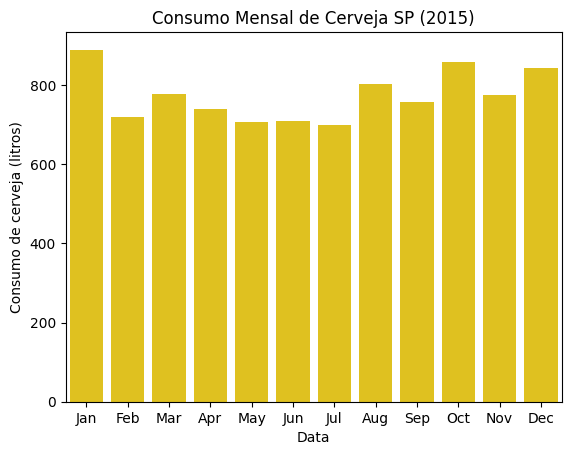

In [3]:
# Cria barplot do consumo mensal de cerveja
consumo_mensal = df_consumption.resample('ME').sum()
consumo_mensal

consumo_mensal.index = consumo_mensal.index.strftime('%b')
sns.barplot(data=consumo_mensal, x=consumo_mensal.index, y='Consumo de cerveja (litros)', color='gold').set(title='Consumo Mensal de Cerveja SP (2015)')

Abaixo podemos visualizar que aos finais de semana o consumo de cerveja aumenta em média, 20%

In [4]:
# Calcula aumento de consumo de cerveja no final de semana
cons_fds = df_consumption.groupby('Final de Semana')['Consumo de cerveja (litros)'].mean()
cons_fds = pd.DataFrame(cons_fds)
cons_fds.pct_change()

,Consumo de cerveja (litros)
Final de Semana,
0.0,NaN
1.0,0.205203


No mapa de correlação das variáveis, podemos ver que o consumo de cerveja apresenta alta correlação com Temperatura média e máxima e também com o fato de ser final de semana. Ao contrário, podemos ver uma correlação negativa entre o consumo de cerveja e a precipitação

<Axes: >

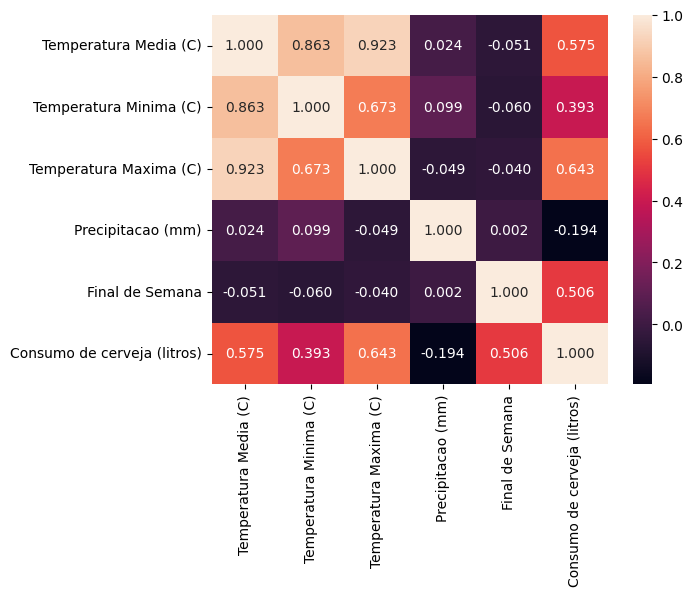

In [5]:
# Heatmap de correlação
sns.heatmap(df_consumption.corr(), annot=True, fmt='.3f')

 Com mais detalhes, podemos ver a correlação positiva entre o consumo de cerveja e a temperatura média.

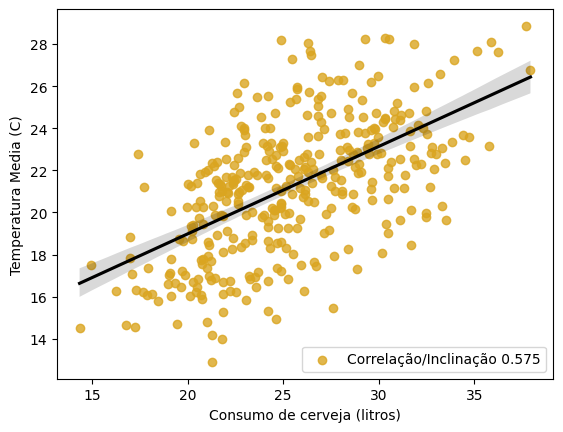

In [6]:
# Scatter plot (Gráfico de Dispersão) da Temp. Média x Consumo de Cerveja
fig = sns.regplot(data=df_consumption, x='Consumo de cerveja (litros)', y='Temperatura Media (C)', scatter_kws=dict(color='goldenrod'),
            line_kws=dict(color="black"))
fig.add_container(plt.legend(['Correlação/Inclinação 0.575']))

Aqui vemos a evolução do consumo de cerveja e temperatura máxima ao longo do ano. Por ele, podemos ter uma ideia melhor da correlação entre as variáveis. Como esperado, nos meses de inverno onde a temperatura abaixa, o consumo de cerveja também diminui significativamente. Ao contrário, nos meses de verão quando a temperatura aumenta, o consumo de cerveja também aumenta.

In [7]:
# Gráfico de linha do consumo de cerveja x temperatura máxima mensal

df_mensal = df_consumption.resample('ME').mean()
px.line(df_mensal, x=df_mensal.index, y=['Temperatura Maxima (C)', 'Consumo de cerveja (litros)'], title='Consumo de Cerveja X Temperatura Máxima (Mensal - 2015)')